<h1>First Made modle</h1>
<p>This model aims to perdict house prices based on the size and then grow into more comlex model</p>

<h2>Importing Libraries</h2>

In [37]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os


<h2>Loading the dataset</h2>

In [38]:
#loads the environmental variables
load_dotenv()

#uses the environment variable dataset to load the data
csv_path=os.getenv("dataset")

#generates a pandas data frame out of the csv file
df = pd.read_csv(csv_path)

<h2>Getting the data ready fot training</h2>

In [39]:
#setting the feature and target columns
train_y = df["price"]
train_x = df["area"]

#convering the columns into numpy arrays
train_y = train_y.to_numpy()
train_x = train_x.to_numpy()

#test if it worked
print("X shape:", train_x.shape)
print("y shape:", train_y.shape)


X shape: (545,)
y shape: (545,)


<h2>Plotting the features and target on the graph for better visualization</h2>

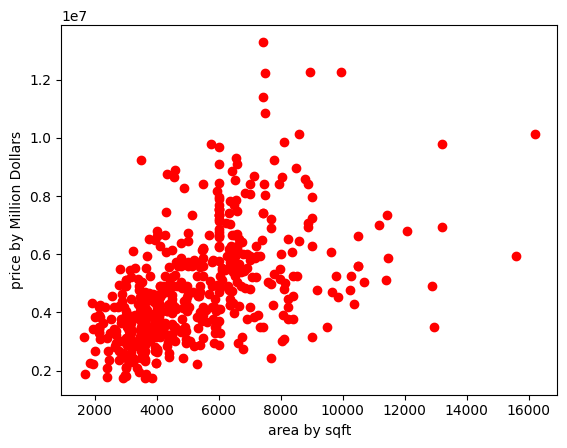

In [40]:
plt.scatter(train_x,train_y,marker='o',color='r')
plt.ylabel('price by Million Dollars')
plt.xlabel('area by sqft')
plt.show()

<h2>the linear regression model</h2>

In [41]:
def Model_1(x,w,b):

    #gets the number of rows in the training data (how many datasets we are training on)
    m = x.shape[0]

    #creats an empty array to store predictions
    f_wb = np.zeros(m)

    '''
    our model which for each entry in the training
    data it will make a perdiction using linear regression
    '''
    for i in range(m):
        f_wb[i] = ((w * x[i]) + b)

    return f_wb


<h2>Visualising the graph so we can find the line of best fit manually<br><br> to the best of ability</h2>

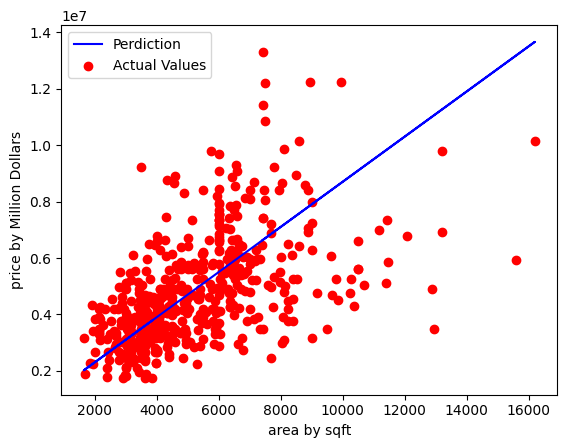

In [42]:
w =800 #Defines our weight
b = 700000 #Defines our bias

perdictions = Model_1(train_x,w,b)

plt.plot(train_x,perdictions,c='b', label='Perdiction')
plt.scatter(train_x,train_y,marker='o',color='r', label='Actual Values')
plt.ylabel('price by Million Dollars')
plt.xlabel('area by sqft')
plt.legend()
plt.show()

<h2>Making the first perdictions</h2>

In [43]:
x_i = 7420
cost_7sqft = w * x_i + b
print(f'weight = {w} and bias is {b}')
print(f'A {train_x[0]} sqft house costs ${train_y[0]}')

print(f"Model predicted a house that is {x_i} sqft costs ${cost_7sqft}")

print(f'Model is off by ${train_y[0] - cost_7sqft}')

weight = 800 and bias is 700000
A 7420 sqft house costs $13300000
Model predicted a house that is 7420 sqft costs $6636000
Model is off by $6664000


<h2>Implementing a basic cost function</h2>
<p>The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$</p>

In [44]:
def Cost(x,y,w,b):

    m = x.shape[0]

    sumCost = 0 #initialises a variable equal to zero
    for i in range(m):
        fw_i = w * x[i] + b
        '''calculates cost per perdiction by subtracting the perdiction
        from target and raising it to the power two'''
        cost = (fw_i - y[i])**2
        #calculatesa and stores the sum of all errors
        sumCost += cost
    #Divides the sum of all costs by 2m to complete the cost function
    TotalCost = sumCost/(2*m)

    return TotalCost

print(f'Current cost of Model_1 is {round(Cost(train_x,train_y,w,b)/1000000, 4)}')


Current cost of Model_1 is 1514435.7779


<h1>Implementing Batch Gradiant Descent</h1>

<h2>Computing the Gradiant</h2>

In [45]:
def ComputeGradiant(x,y,w,b):

    m = x.shape[0]

    dw = db = 0 #initializes a base w and b value of 0

    for i in range(m):
        # linear regression model
        fw_i = w * x[i] + b

        #calculates the value of the derivative of W
        temp_w = (fw_i - y[i])*x[i]
        #calculates the value of the derivative of b
        temp_b = (fw_i - y[i])
        # adds all the calculated values
        dw += temp_w
        db += temp_b
    #divides the summation function result by m
    dw = dw/m
    db = db/m
    return dw,db

<h2>Gradiant Descent Function</h2>

In [46]:
def GradiantDescent(x,y,a,iterations):

    b=w=0

    for i in range(iterations):
        #Computing the gradiant
        dw,db = ComputeGradiant(x,y,w,b)
        #performing the Gradiant Descent
        w -= (a*dw)
        b -= (a*db)

    return w,b

In [47]:
iterations = 10000
a = 1e-10


final_w,final_b = GradiantDescent(train_x,train_y,a,iterations)
print(f'final weight = {final_w}')
print(f'final bias = {final_b}')

final weight = 855.7098692224644
final bias = 0.5004906667018234


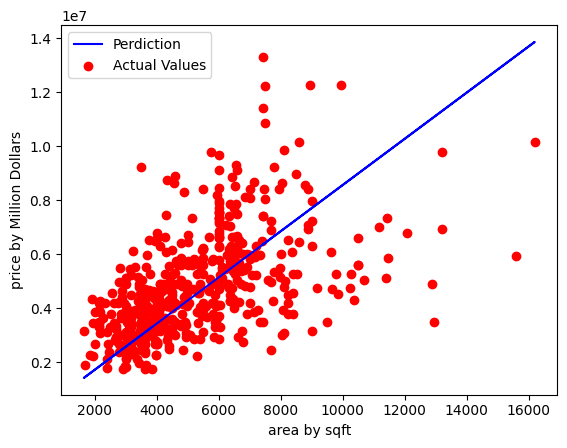

In [48]:


perdictions = Model_1(train_x,final_w,final_b)

plt.plot(train_x,perdictions,c='b', label='Perdiction')
plt.scatter(train_x,train_y,marker='o',color='r', label='Actual Values')
plt.ylabel('price by Million Dollars')
plt.xlabel('area by sqft')
plt.legend()
plt.show()

In [49]:
x_i = 7420
cost_7sqft_new = final_w * x_i + final_b
print(f'weight = {final_w} and bias is {final_w}')
print(f'A {train_x[0]} sqft house costs ${train_y[0]}')

print(f"Model predicted a house that is {x_i} sqft costs ${cost_7sqft_new}")

print(f'Model is off by ${train_y[0] - cost_7sqft_new}')


weight = 855.7098692224644 and bias is 855.7098692224644
A 7420 sqft house costs $13300000
Model predicted a house that is 7420 sqft costs $6349367.730121352
Model is off by $6950632.269878648


In [50]:
print(f'perdiction before GD {cost_7sqft} perdiction after GD {cost_7sqft_new}\ndifference = {cost_7sqft_new-cost_7sqft}\nactual cost = {train_y[0]}')

perdiction before GD 6636000 perdiction after GD 6349367.730121352
difference = -286632.2698786482
actual cost = 13300000


In [51]:
print(f'new cost = {Cost(train_x,train_y,final_w,final_b)}')
print(f'cost difference = {Cost(train_x,train_y,w,b)-Cost(train_x,train_y,final_w,final_b)}')

new cost = 1673381896584.2805
cost difference = -158946118640.61084


<h1>testing</h1>

In [68]:
mu  = np.mean(train_x, axis=0, keepdims=True)
std = np.std(train_x,  axis=0, keepdims=True)
std = np.where(std == 0.0, 1.0, std)

Xtr = (train_x - mu) / std
a=0.5
final_w,final_b = GradiantDescent(Xtr,train_y,a,iterations)

print(f'final weight = {final_w}')
print(f'final bias = {final_b}')

final weight = 1001630.4758732349
final bias = 4766729.247706423


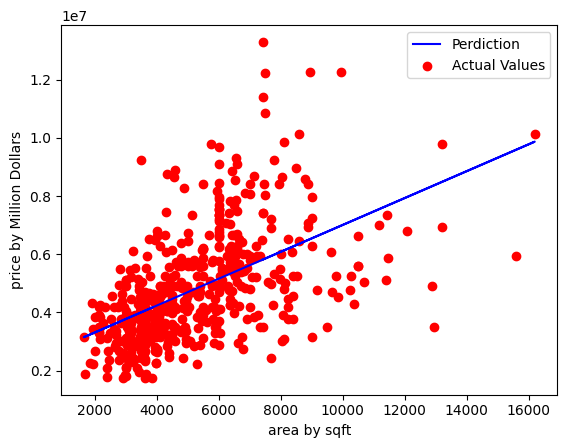

In [71]:


perdictions = Model_1(Xtr, final_w, final_b)

plt.plot(train_x, perdictions, c='b', label='Perdiction')
plt.scatter(train_x, train_y, marker='o', color='r', label='Actual Values')
plt.ylabel('price by Million Dollars')
plt.xlabel('area by sqft')
plt.legend()
plt.show()

In [72]:
x_i = 7420
cost_7sqft_new = final_w * x_i + final_b
print(f'weight = {final_w} and bias is {final_w}')
print(f'A {train_x[0]} sqft house costs ${train_y[0]}')

print(f"Model predicted a house that is {x_i} sqft costs ${cost_7sqft_new}")

print(f'Model is off by ${train_y[0] - cost_7sqft_new}')

weight = 1001630.4758732349 and bias is 1001630.4758732349
A 7420 sqft house costs $13300000
Model predicted a house that is 7420 sqft costs $7436864860.22711
Model is off by $-7423564860.22711


In [73]:
print(f'perdiction before GD {cost_7sqft} perdiction after GD {cost_7sqft_new}\ndifference = {cost_7sqft_new-cost_7sqft}\nactual cost = {train_y[0]}')


perdiction before GD 6636000 perdiction after GD 7436864860.22711
difference = 7430228860.22711
actual cost = 13300000


In [74]:
print(f'new cost = {Cost(train_x,train_y,final_w,final_b)}')
print(f'cost difference = {Cost(train_x,train_y,w,b)-Cost(train_x,train_y,final_w,final_b)}')

new cost = 1.5663259211378751e+19
cost difference = -1.5663257696942973e+19
